# 엑셀에서 데이터 읽기

In [1]:
# -*- coding:utf-8 -*-
import openpyxl
from bs4 import BeautifulSoup
from urllib.request import urlopen
import csv, re, requests
import time


# 엑셀파일 열기
filename = "test.xlsx"
book = openpyxl.load_workbook(filename)

# 맨 앞의 시트 추출하기
sheet = book.worksheets[0]

# 시트의 각 행을 순서대로 추출하기
data = []
for row in sheet.rows:
    data.append([row[0].value, row[1].value,row[2].value])

del data[0]

for i in range(len(data)):
    print(data[i])

print(len(data))

[' DM500S9Z-AD3BA', 'SAMSUNG', '2020.11.19']
[' FA506IU-HN174', 'ASUS', '2020.11.19']
[' GA502IV-AZ001T', 'ASUS', '2020.11.19']
[' NT750QCJ-K58A', 'SAMSUNG', '2020.11.19']
[' NT950XCJ-X716A', 'SAMSUNG', '2020.11.19']
['15M A10SE-i7', 'MSI', '2020.11.19']
['15U50N-KR56K', 'LG', '2020.11.19']
['15UD50N-GX50K', 'LG', '2020.11.19']
['15ZD90N-VX5BK', 'LG', '2020.11.19']
['17UD70N-G.AX76K', 'LG', '2020.11.19']
['800G5 TWR 6BD60AV', 'HP', '2020.11.19']
['AS G512LI-HN065', 'ASUS', '2020.11.19']
['B80FV', 'LG', '2020.11.19']
['DB400T9A i5-9400', 'SAMSUNG', '2020.11.19']
['FA706IU-H7100', 'ASUS', '2020.11.19']
['G512LU-AL043', 'ASUS', '2020.11.19']
['G712LU-EV001', 'ASUS', '2020.11.19']
['G731GT-H7114', 'ASUS', '2020.11.19']
['GA502IU-AZ015T', 'ASUS', '2020.11.19']
['GA502IV-AZ001', 'ASUS', '2020.11.19']
['GF75 Thin 9SCXR', 'MSI', '2020.11.19']
['GP75 Leopard 9SD', 'MSI', '2020.11.19']
['GU502LV-AZ015', 'ASUS', '2020.11.19']
['GU502LW-HC111T', 'ASUS', '2020.11.19']
['GX550LWS-HC013R', 'ASUS', '2

# 크롤링하기

In [2]:
start = time.time()  # 시작 시간 저장
result=[]


for i in range(len(data)):
    if data[i][0]== None:
        break
    else:
        url = 'https://search.shopping.naver.com/search/all?query=' + data[i][0]
        print(url)
        req = requests.get(url)   # 크롤링할 페이지 url로 요청 보내기 , req를 출력하면 statuscode만 출력됨
        html = req.text                # html 코드를 가져온다!
        soup = BeautifulSoup(html, 'html.parser')
        if soup.find('span', class_="price_num__2WUXn").text == None:
                         result.append("해당상품없음")
        else:
            data[i].append(soup.find('span', class_="price_num__2WUXn").text)
            
# 작업 코드
 
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
print(data)

https://search.shopping.naver.com/search/all?query= DM500S9Z-AD3BA
https://search.shopping.naver.com/search/all?query= FA506IU-HN174
https://search.shopping.naver.com/search/all?query= GA502IV-AZ001T
https://search.shopping.naver.com/search/all?query= NT750QCJ-K58A
https://search.shopping.naver.com/search/all?query= NT950XCJ-X716A
https://search.shopping.naver.com/search/all?query=15M A10SE-i7
https://search.shopping.naver.com/search/all?query=15U50N-KR56K
https://search.shopping.naver.com/search/all?query=15UD50N-GX50K
https://search.shopping.naver.com/search/all?query=15ZD90N-VX5BK
https://search.shopping.naver.com/search/all?query=17UD70N-G.AX76K
https://search.shopping.naver.com/search/all?query=800G5 TWR 6BD60AV
https://search.shopping.naver.com/search/all?query=AS G512LI-HN065
https://search.shopping.naver.com/search/all?query=B80FV
https://search.shopping.naver.com/search/all?query=DB400T9A i5-9400
https://search.shopping.naver.com/search/all?query=FA706IU-H7100
https://search.s

# 디비로 쓰기

In [3]:
 # -*- coding: utf-8 -*-
import easygui
import pymssql
import datetime
import pandas as pd

now = datetime.datetime.now()
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

# MSSQL 접속
conn = pymssql.connect(host=r"211.233.21.82", user='bif', password='DWBIF2020!@#', database='DB_PRICE', charset='utf8')

# Connection 으로부터 Cursor 생성
cursor = conn.cursor()
try:
    for i in range(len(data)-1):
        #SQL문 실행
        cursor.execute("INSERT INTO dbo.price_table(date, product_ID,company, price)  VALUES (%s,%s,%s,%s);", (nowDate,data[i][0],data[i][1],data[i][3]))
except:
    easygui.msgbox('추가된 데이터 오류 혹은 중복 실행으로 인한 오류', '대원CTS 최저가 비교 크롤링')

else:   
    conn.commit()
    conn.close()

2020-11-27


# 디비에서 데이터 추출

In [89]:
# MSSQL 접속

import re

conn = pymssql.connect(host=r"211.233.21.82", user='bif', password='DWBIF2020!@#', database='DB_PRICE', charset='utf8')

# Connection 으로부터 Cursor 생성
cursor = conn.cursor()
 
# SQL문 실행
cursor.execute('SELECT * FROM dbo.price_table;')
row = cursor.fetchall()
cols = [item[0] for item in cursor.description]
df=pd.DataFrame(row,columns=cols)

df.head()


long=len(df['price'])

for i in range(long):
    slt=re.findall("[0-9]", df['price'][i])
    df['price'][i]=int(''.join(slt))
    
# df.to_csv("C:\\Users\\user\\Desktop\\result.csv")


# 타입 변경

df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%m/%d')

df['price']=pd.to_numeric(df['price'])



In [90]:
df.head()

,date,product_id,price,company
0,11/19,DM500S9Z-AD3BA,548720,SAMSUNG
1,11/19,FA506IU-HN174,1199000,ASUS
2,11/19,GA502IV-AZ001T,1699000,ASUS
3,11/19,NT750QCJ-K58A,1797990,SAMSUNG
4,11/19,NT950XCJ-X716A,2087700,SAMSUNG


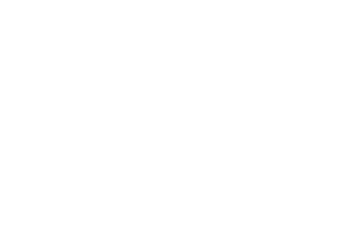

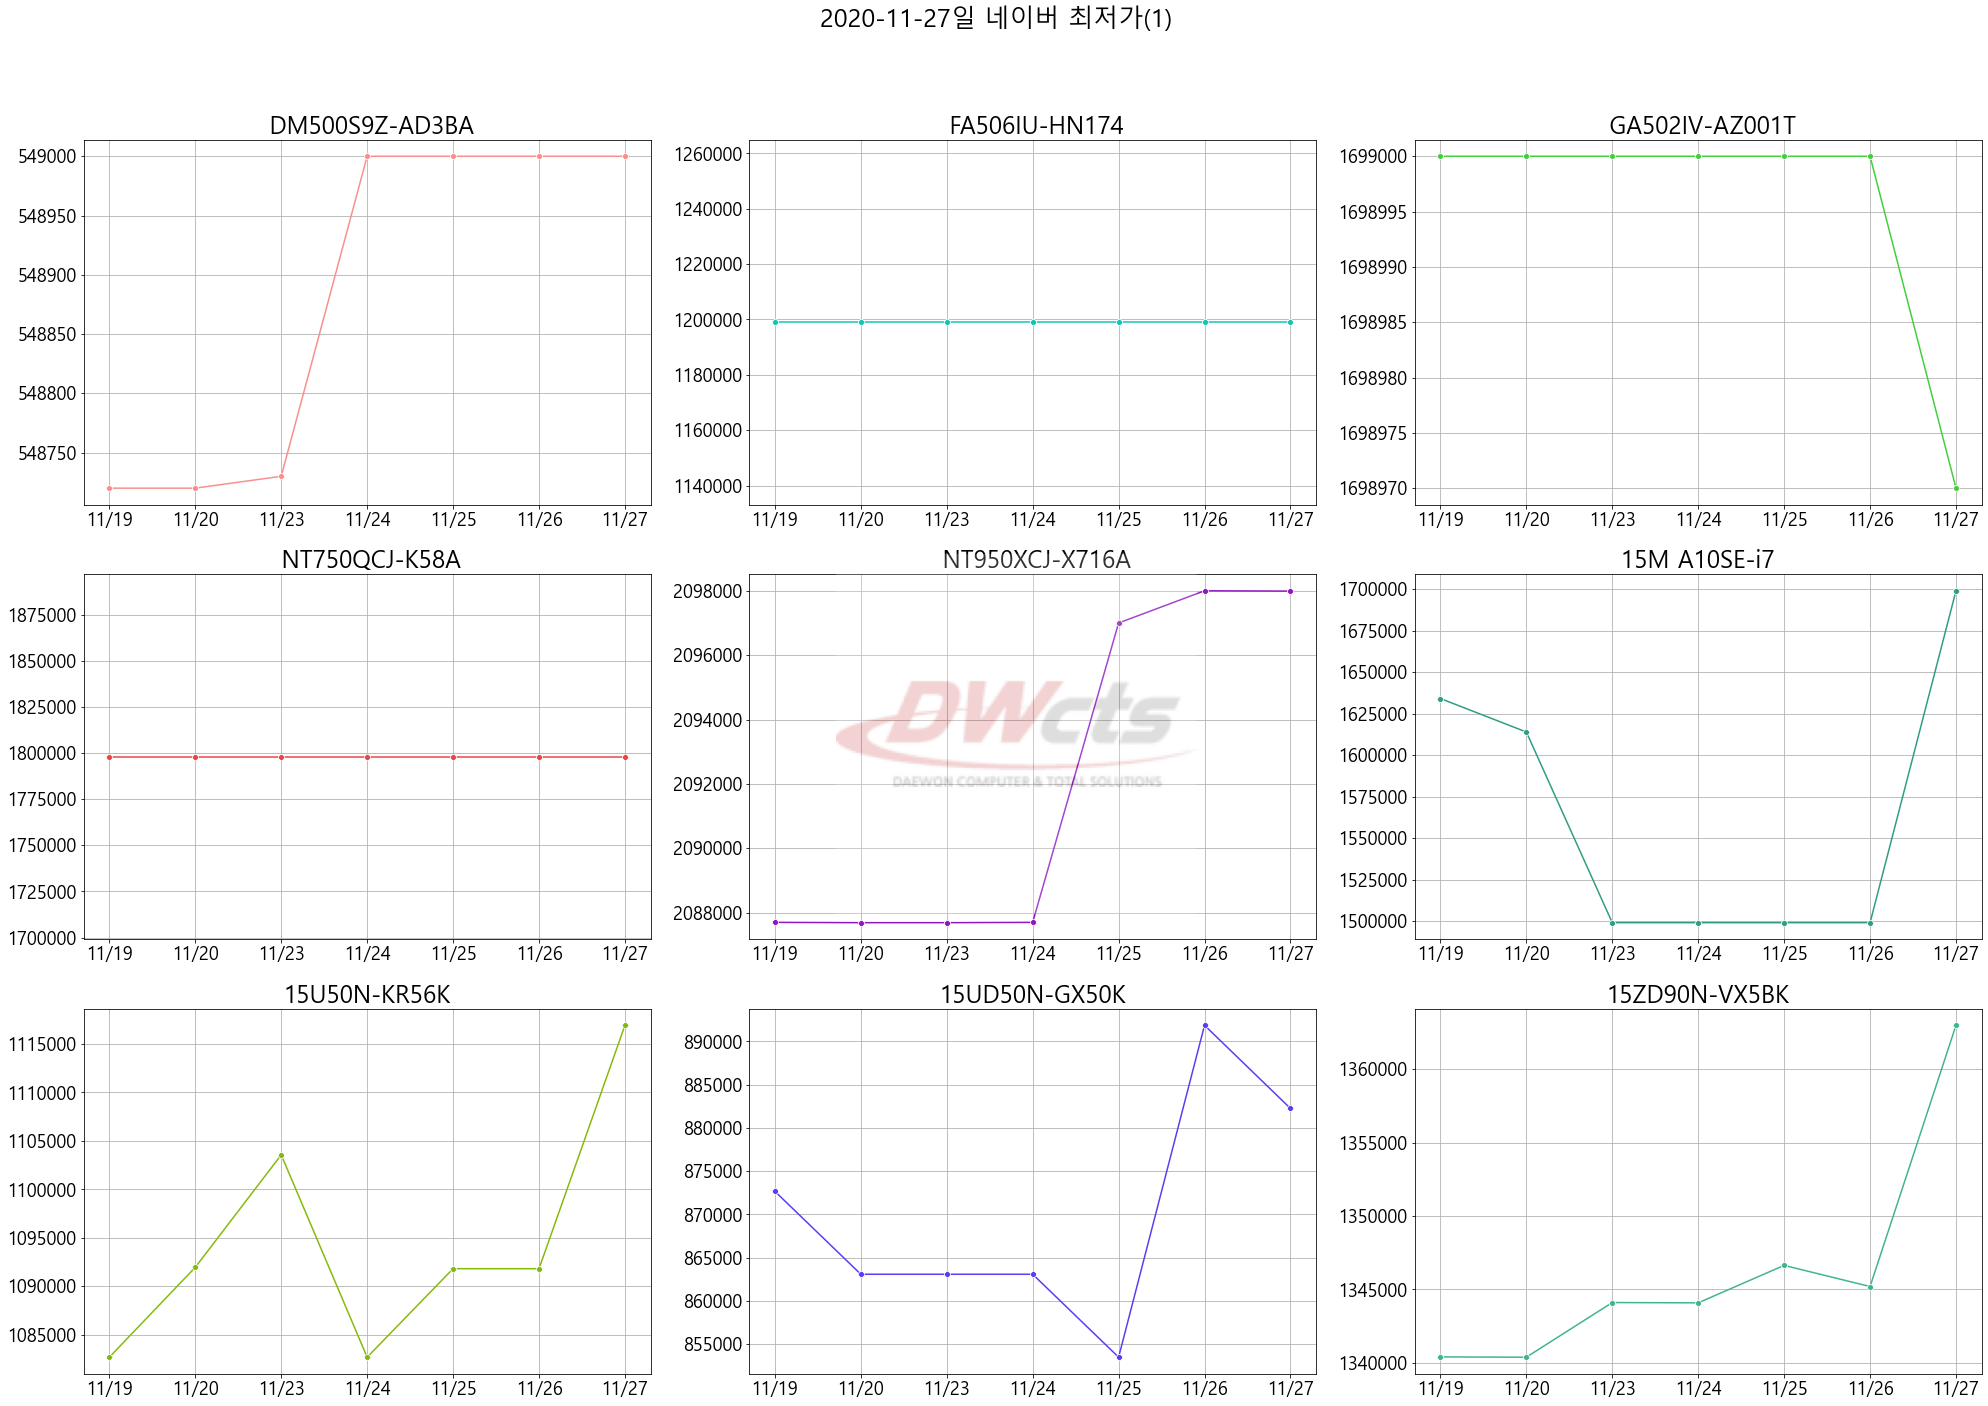

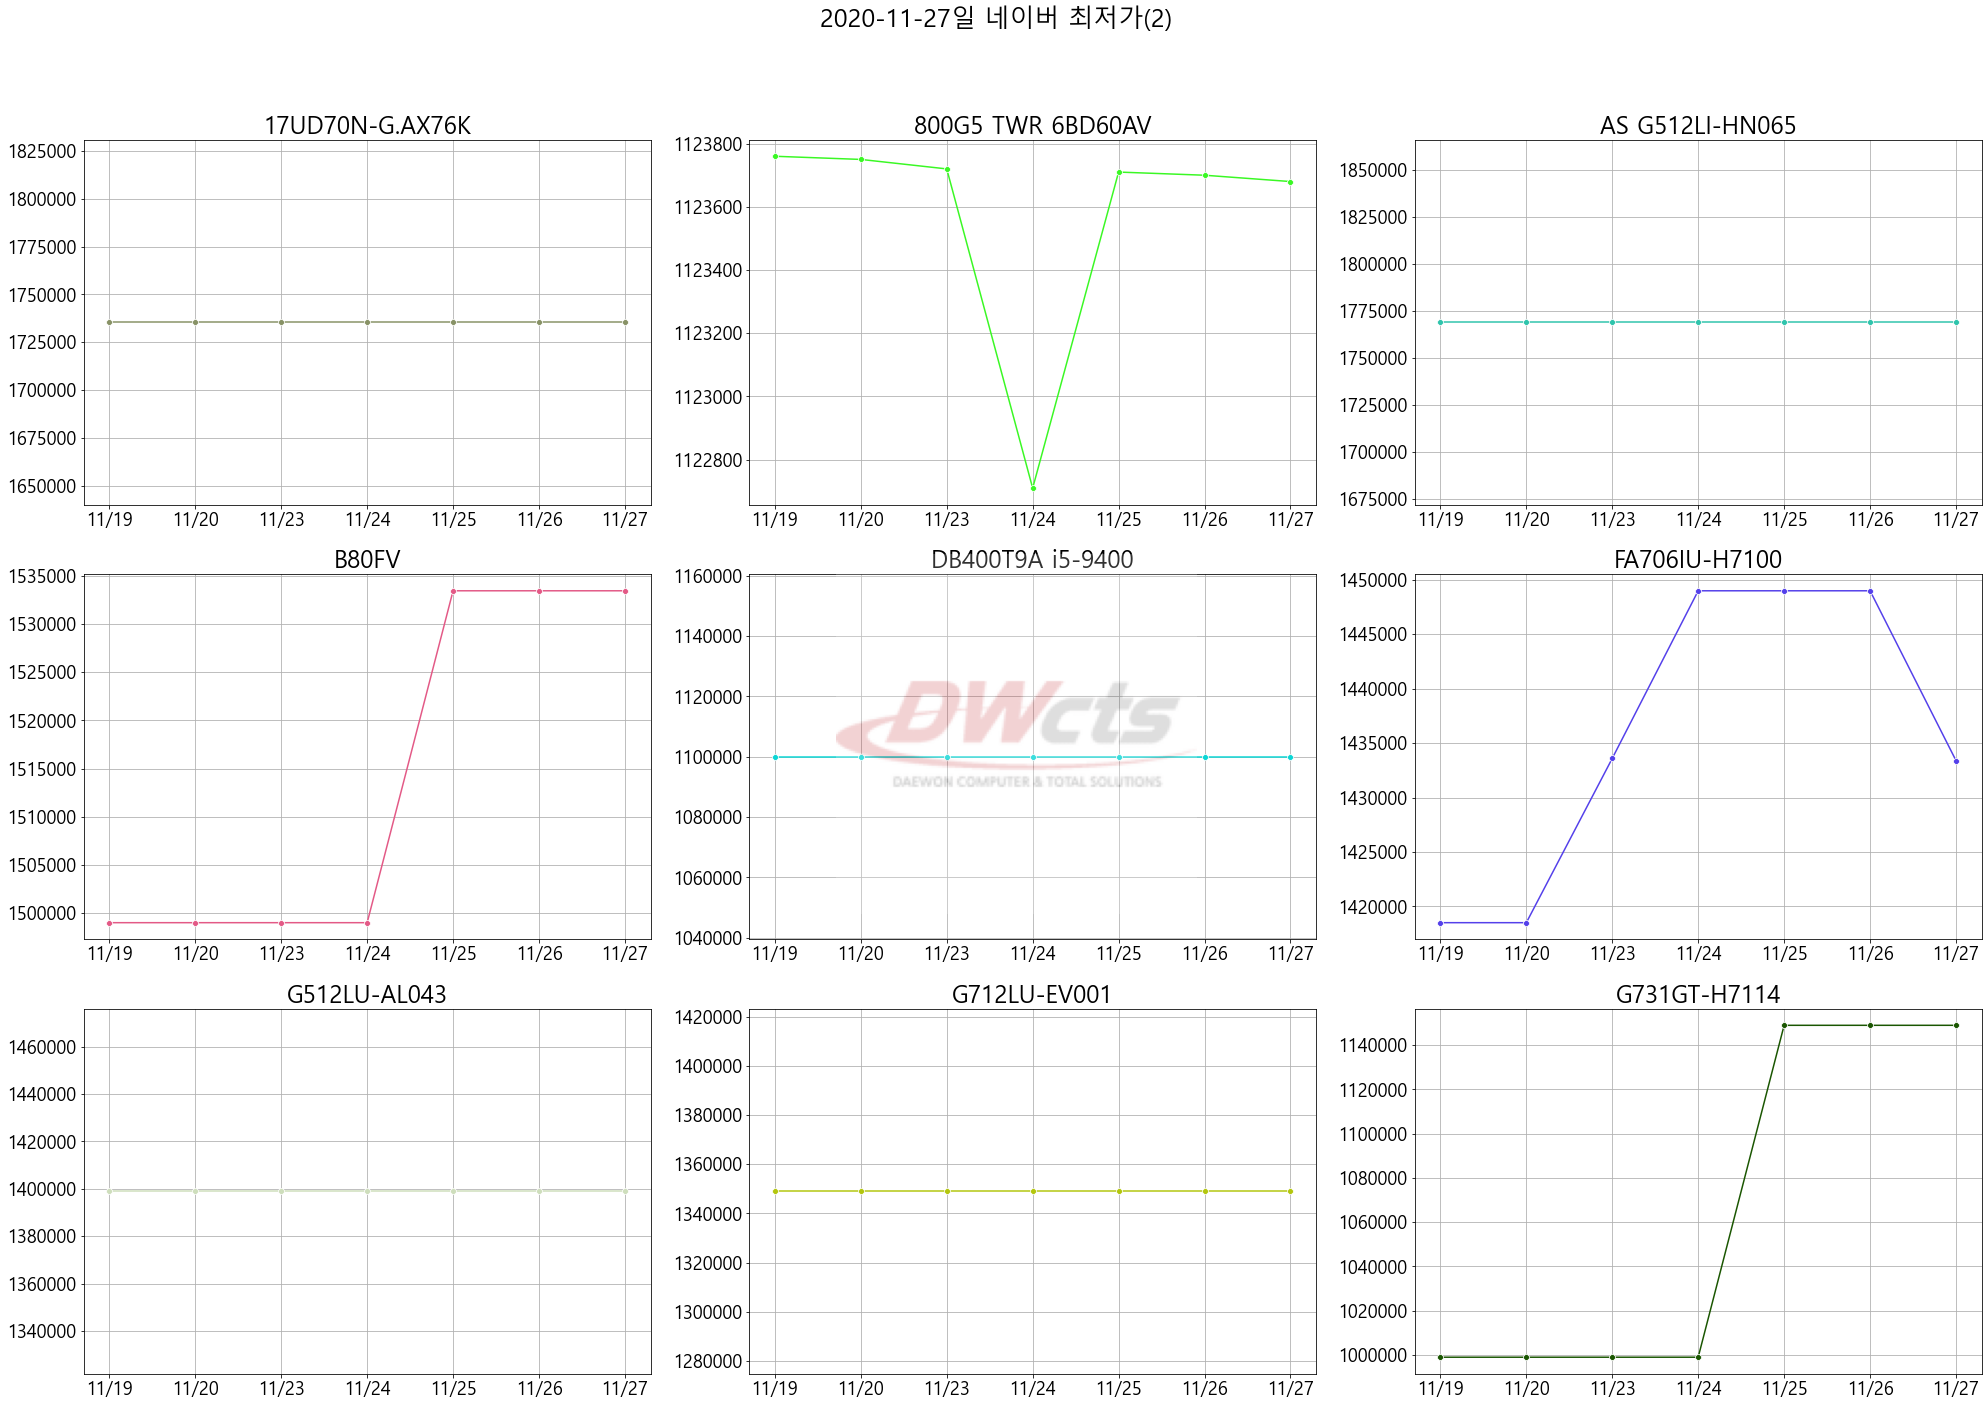

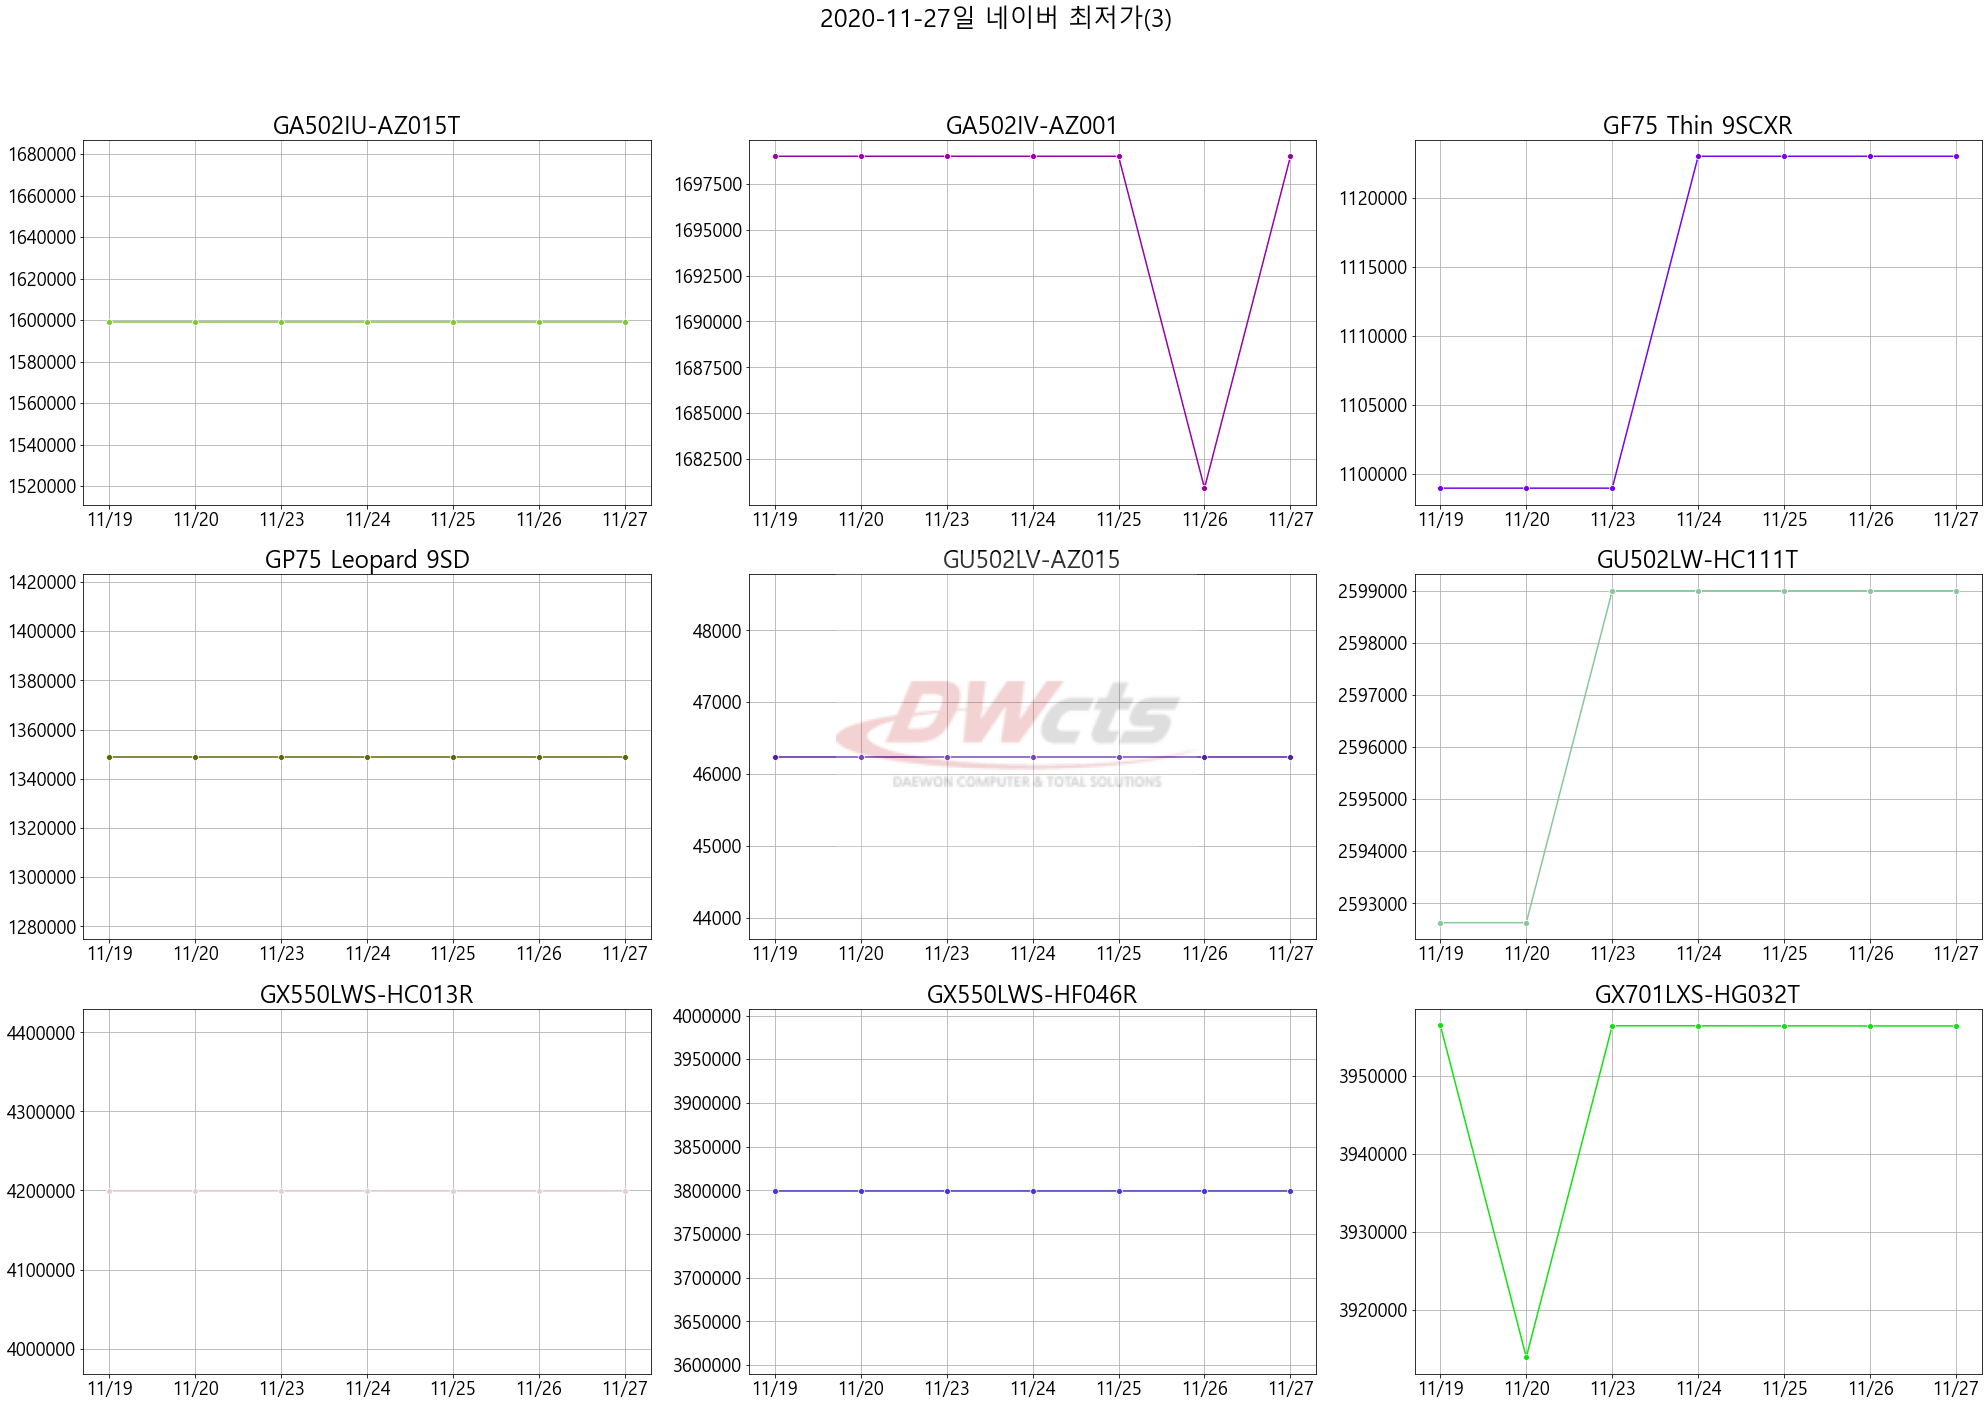

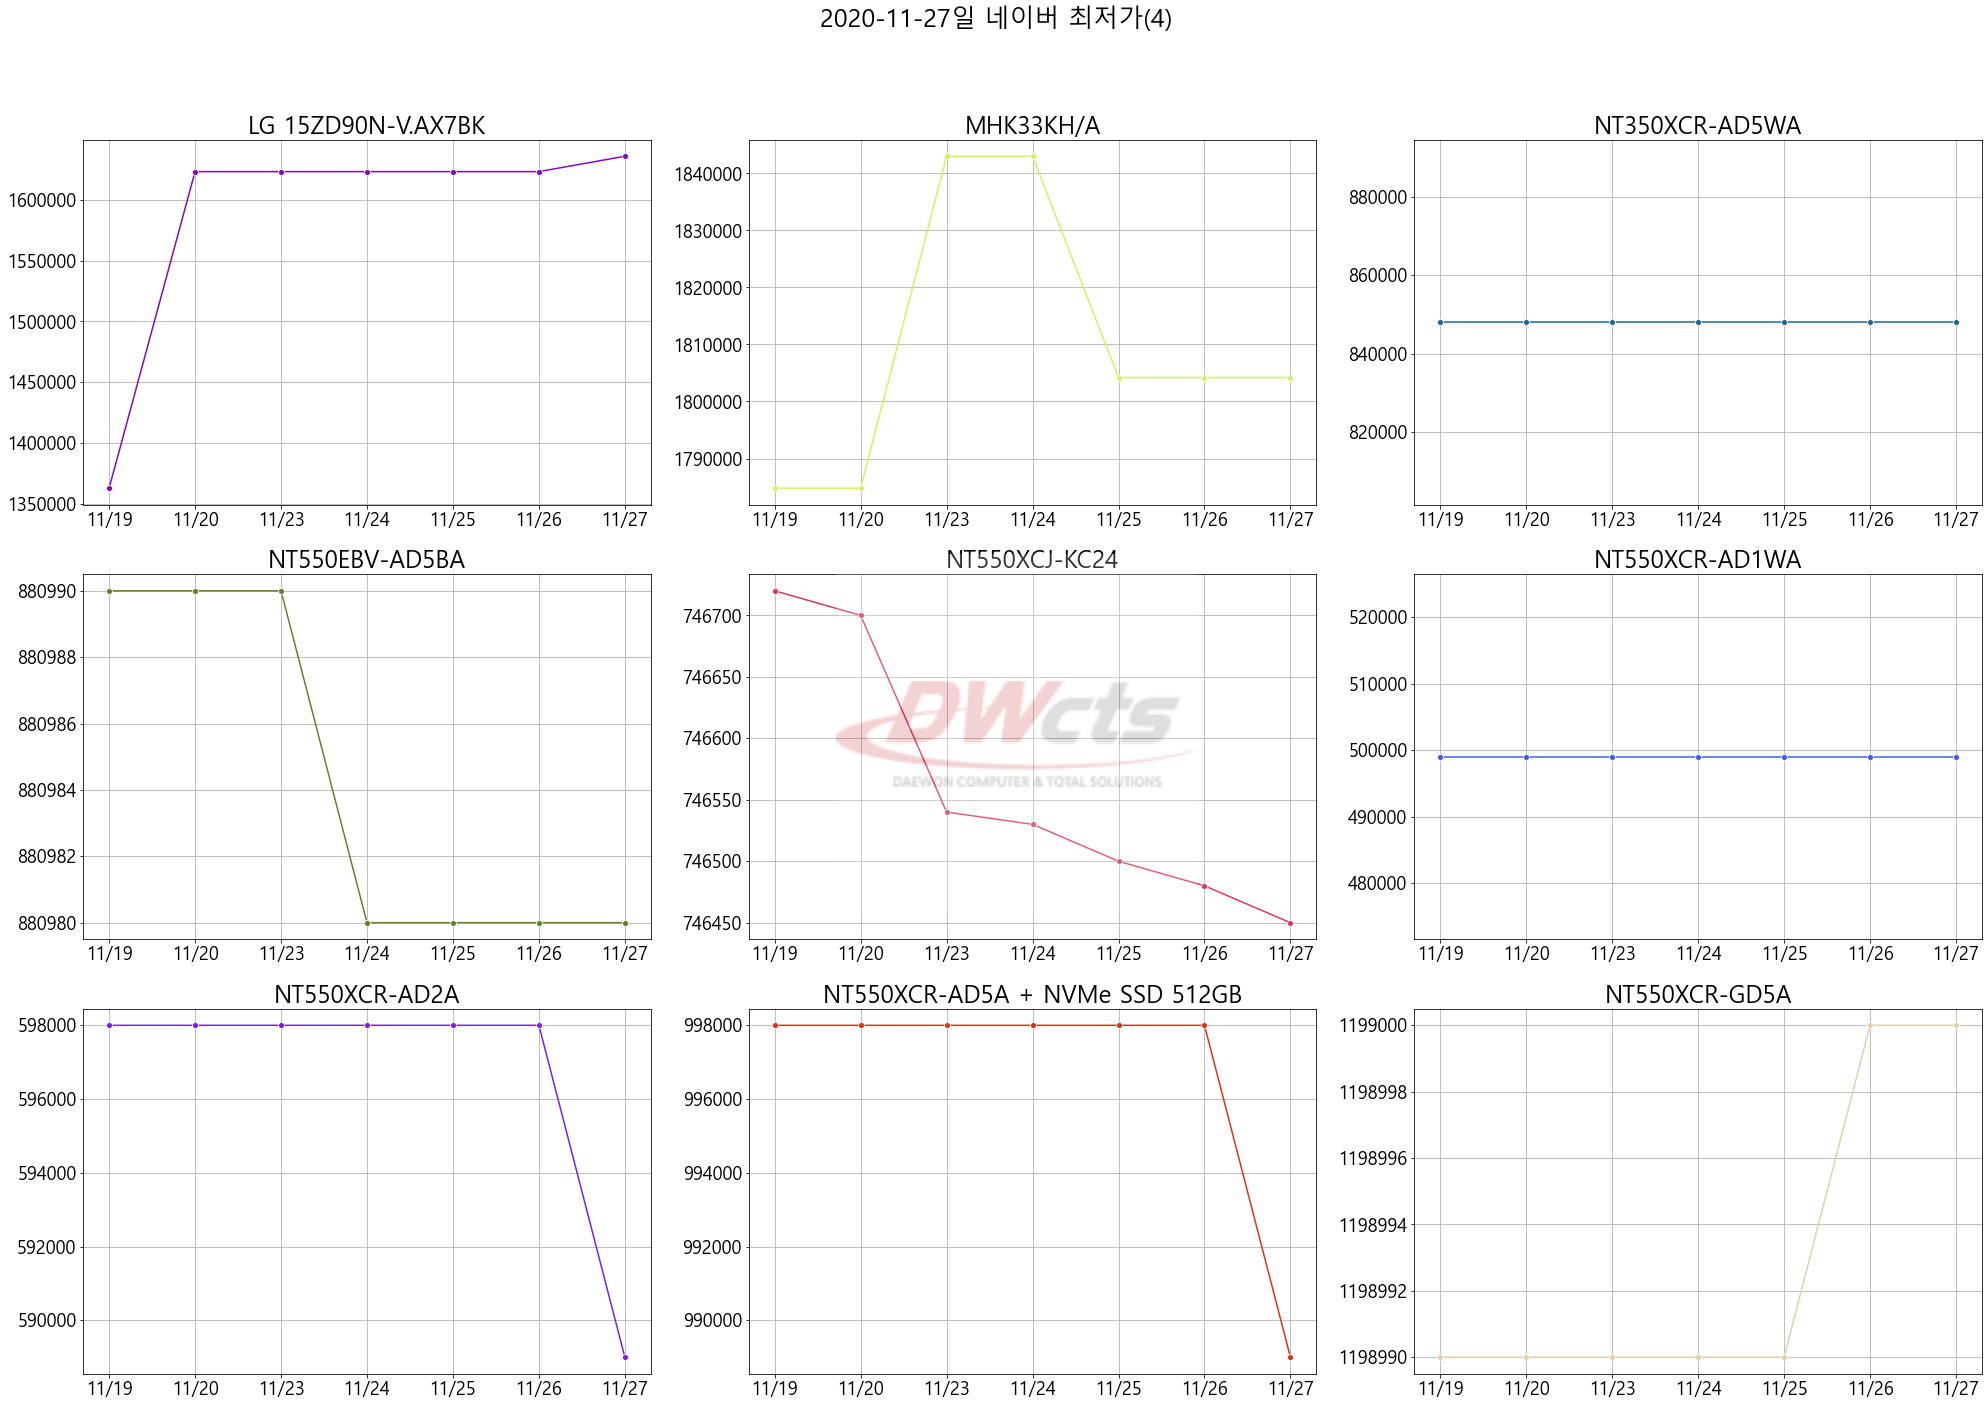

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.font_manager as fm
import numpy as np


plt.rcParams['font.size'] = 18

product_id=df['product_id'].unique()
title=nowDate + "일 네이버 최저가"

plt.rc('font', family='Malgun Gothic')

pd0=product_id[:9]
pd1=product_id[9:18]
pd2=product_id[18:27]
pd3=product_id[27:36]

im_wm=plt.imread('./daewon.png')
plt.grid(False)
plt.axis("off")

"""
font_location = './NanumFontSetup_TTF_ALL/NanumGothic.ttf' 
font_name = fm.FontProperties(fname=font_location).get_name()
"""


count=1
def make_plot(list):
    j=0
    global count
    fig, axe = plt.subplots(nrows=3, ncols=3, figsize=(28,20))
    for i,name in enumerate(list):

        R=np.random.random()
        G=np.random.random()
        B=np.random.random()
        color=[R,G,B]
        k=int(i/3)
        sns.lineplot(x='date',y='price' ,data=df[df['product_id']==list[i]],marker='8',color=color ,ax=axe[k,j])
        axe[k,j].ticklabel_format(axis='y',style='plain',useOffset=False)
        axe[k,j].set_title(list[i],fontsize=24)
        axe[k,j].set_xlabel('')
        axe[k,j].set_ylabel('')
        axe[k,j].grid()
        axe[k,j].xaxis.set_major_locator(MultipleLocator(1))
        j+=1
        if j==3:
            j=0
    fig.suptitle(title+"("+str(count)+")", fontsize=25)
    fig.tight_layout(rect=[0.00,0.00,1,0.95])
    fig.set_facecolor("white")

    ax_watermark=fig.add_axes([0.385,0.35,0.25,0.25])
    ax_watermark.imshow(im_wm,alpha=0.2)
    ax_watermark.grid(False)
    ax_watermark.axis("off")
    count+=1


make_plot(예시 1)
fig.savefig("./예시 1.png")

make_plot(예시 2)
fig.savefig("./예시 2.png")


In [79]:
data=df[df['product_id']==pd0[i]]
data.head()

,date,product_id,price,company
8,11/19,15ZD90N-VX5BK,1340410,LG
45,11/20,15ZD90N-VX5BK,1340390,LG
82,11/23,15ZD90N-VX5BK,1344110,LG
119,11/24,15ZD90N-VX5BK,1344090,LG
156,11/25,15ZD90N-VX5BK,1346640,LG


'\nfig1, axe = plt.subplots(nrows=3, ncols=3, figsize=(18,16))\nfor i,name in enumerate(pd1):\n    \n    R=np.random.random()\n    G=np.random.random()\n    B=np.random.random()\n    color=[R,G,B]\n    k=int(i/3)\n    sns.lineplot(x=\'date\',y=\'price\' ,data=df[df[\'product_id\']==pd1[i]],marker=\'8\',color=color ,ax=axe[k,j])\n    axe[k,j].set_title(pd1[i],fontsize=15)\n    axe[k,j].set_xlabel(\'\')\n    axe[k,j].set_ylabel(\'\')\n    axe[k,j].grid()\n    axe[k,j].xaxis.set_major_locator(MultipleLocator(1.4))\n    axe[k,j].yaxis.get_offset_text().set_visible(False)\n\n    j+=1\n    if j==3:\n        j=0\nfig1.suptitle(title+"(2)", fontsize=25)\nfig1.tight_layout(rect=[0.00,0.00,1,0.95])\nfig1.set_facecolor("white")\n\nax_watermark=fig1.add_axes([0.385,0.35,0.25,0.25])\nax_watermark.imshow(im_wm,alpha=0.07)\nax_watermark.grid(False)\nax_watermark.axis("off")\n\n\nfig1.savefig("./네이버최저가(2).png")\n\n\nfig2, axe = plt.subplots(nrows=3, ncols=3, figsize=(18,16))\nfor i,name in enumerate(p

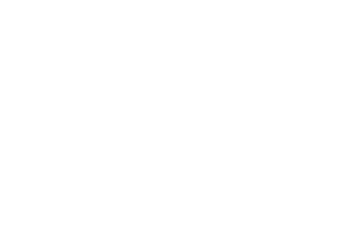

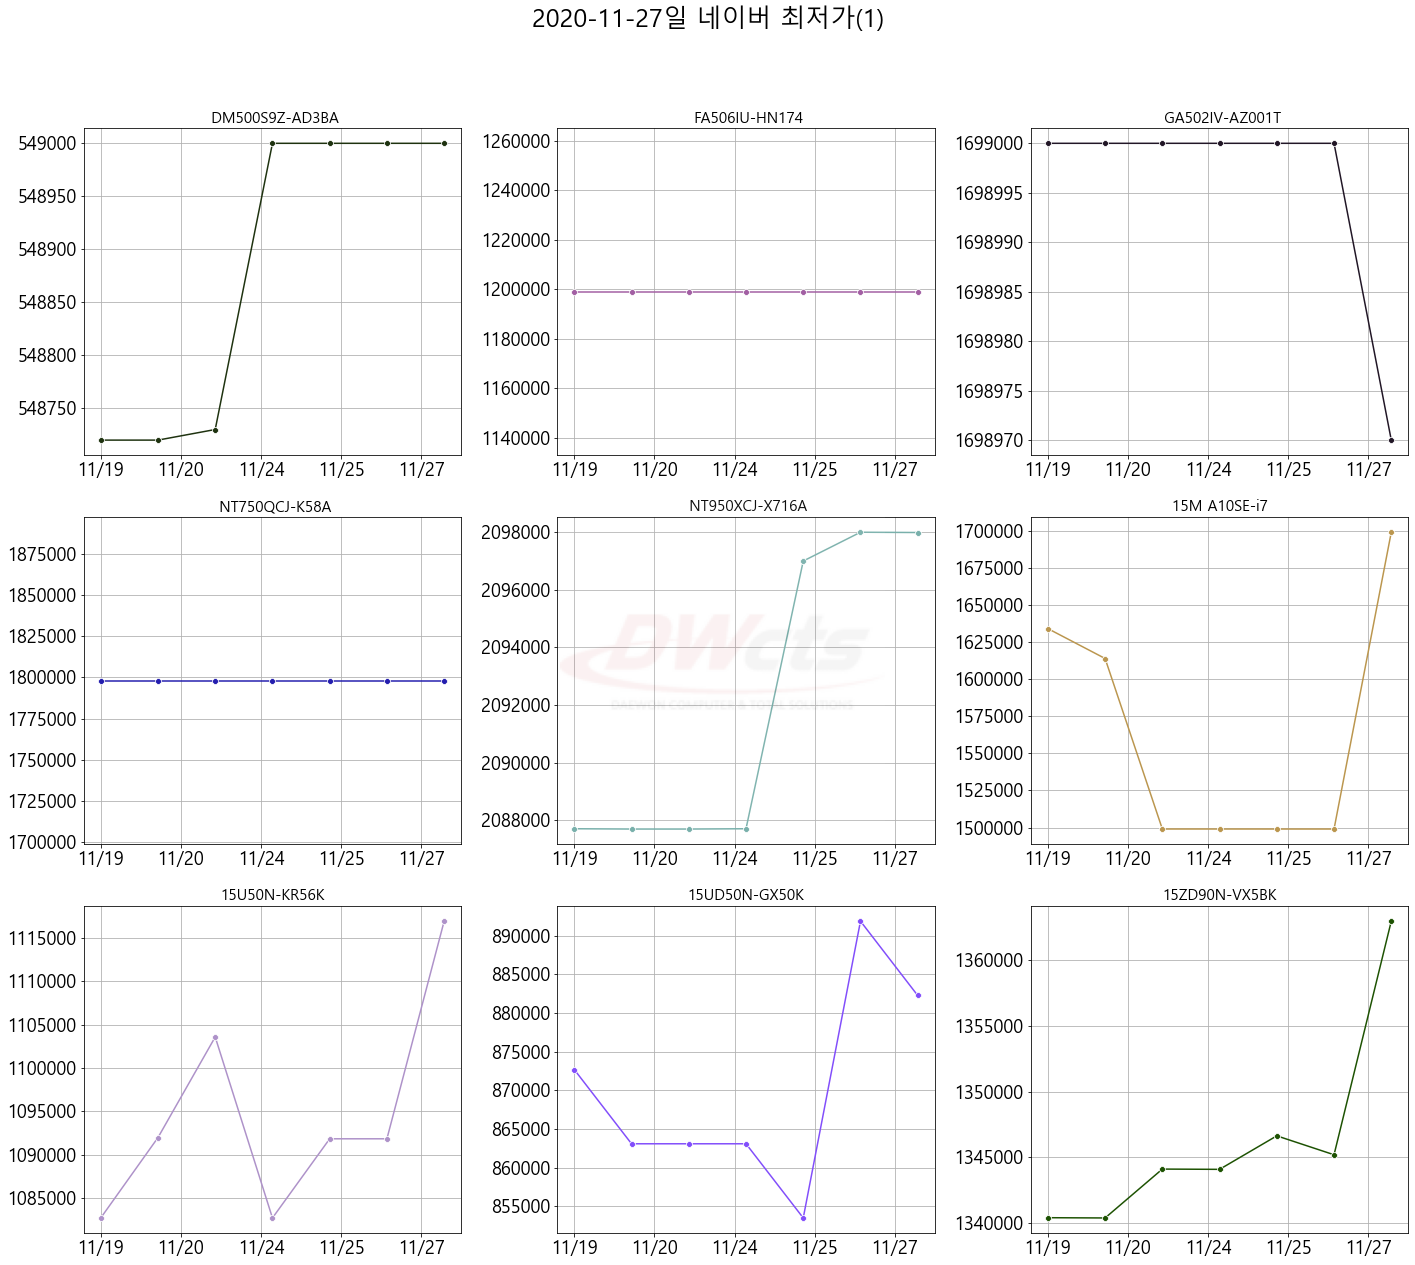

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.font_manager as fm
import numpy as np

plt.rcParams["axes.formatter.useoffset"] = False

product_id=df['product_id'].unique()
title=nowDate + "일 네이버 최저가"

plt.rc('font', family='Malgun Gothic')

pd0=product_id[:9]
pd1=product_id[9:18]
pd2=product_id[18:27]
pd3=product_id[27:36]

im_wm=plt.imread('./daewon.png')
plt.grid(False)
plt.axis("off")

"""
font_location = './NanumFontSetup_TTF_ALL/NanumGothic.ttf' 
font_name = fm.FontProperties(fname=font_location).get_name()
"""


j=0


fig, axe = plt.subplots(nrows=3, ncols=3, figsize=(20,18))
for i,name in enumerate(pd0):
    
    R=np.random.random()
    G=np.random.random()
    B=np.random.random()
    color=[R,G,B]
    k=int(i/3)
    sns.lineplot(x='date',y='price' ,data=df[df['product_id']==pd0[i]],marker='8',color=color ,ax=axe[k,j])
    axe[k,j].ticklabel_format(axis='y',style='plain',useOffset=False)
    axe[k,j].set_title(pd0[i],fontsize=15)
    axe[k,j].set_xlabel('')
    axe[k,j].set_ylabel('')
    axe[k,j].grid()
    axe[k,j].xaxis.set_major_locator(MultipleLocator(1.4))
    j+=1
    if j==3:
        j=0
fig.suptitle(title+"(1)", fontsize=25)
fig.tight_layout(rect=[0.00,0.00,1,0.95])
fig.set_facecolor("white")

ax_watermark=fig.add_axes([0.385,0.35,0.25,0.25])
ax_watermark.imshow(im_wm,alpha=0.06)
ax_watermark.grid(False)
ax_watermark.axis("off")


fig.savefig("./네이버최저가(1).png")

"""
fig1, axe = plt.subplots(nrows=3, ncols=3, figsize=(18,16))
for i,name in enumerate(pd1):
    
    R=np.random.random()
    G=np.random.random()
    B=np.random.random()
    color=[R,G,B]
    k=int(i/3)
    sns.lineplot(x='date',y='price' ,data=df[df['product_id']==pd1[i]],marker='8',color=color ,ax=axe[k,j])
    axe[k,j].set_title(pd1[i],fontsize=15)
    axe[k,j].set_xlabel('')
    axe[k,j].set_ylabel('')
    axe[k,j].grid()
    axe[k,j].xaxis.set_major_locator(MultipleLocator(1.4))
    axe[k,j].yaxis.get_offset_text().set_visible(False)

    j+=1
    if j==3:
        j=0
fig1.suptitle(title+"(2)", fontsize=25)
fig1.tight_layout(rect=[0.00,0.00,1,0.95])
fig1.set_facecolor("white")

ax_watermark=fig1.add_axes([0.385,0.35,0.25,0.25])
ax_watermark.imshow(im_wm,alpha=0.07)
ax_watermark.grid(False)
ax_watermark.axis("off")


fig1.savefig("./네이버최저가(2).png")


fig2, axe = plt.subplots(nrows=3, ncols=3, figsize=(18,16))
for i,name in enumerate(pd2):
    
    R=np.random.random()
    G=np.random.random()
    B=np.random.random()
    color=[R,G,B]
    k=int(i/3)
    sns.lineplot(x='date',y='price' ,data=df[df['product_id']==pd2[i]],marker='8',color=color ,ax=axe[k,j])
    axe[k,j].set_title(pd2[i],fontsize=15)
    axe[k,j].set_xlabel('')
    axe[k,j].set_ylabel('')
    axe[k,j].grid()
    axe[k,j].xaxis.set_major_locator(MultipleLocator(1.4))
    axe[k,j].yaxis.get_offset_text().set_visible(False)
    j+=1
    if j==3:
        j=0
fig2.suptitle(title+"(3)", fontsize=25)
fig2.tight_layout(rect=[0.00,0.00,1,0.95])
fig2.set_facecolor("white")

ax_watermark=fig2.add_axes([0.385,0.35,0.25,0.25])
ax_watermark.imshow(im_wm,alpha=0.07)
ax_watermark.grid(False)
ax_watermark.axis("off")


fig2.savefig("./네이버최저가(3).png")


fig3, axe = plt.subplots(nrows=3, ncols=3, figsize=(18,16))
for i,name in enumerate(pd3):
    
    R=np.random.random()
    G=np.random.random()
    B=np.random.random()
    color=[R,G,B]
    k=int(i/3)
    sns.lineplot(x='date',y='price' ,data=df[df['product_id']==pd3[i]],marker='8',color=color ,ax=axe[k,j])
    axe[k,j].set_title(pd3[i],fontsize=15)
    axe[k,j].set_xlabel('')
    axe[k,j].set_ylabel('')
    axe[k,j].grid()
    axe[k,j].xaxis.set_major_locator(MultipleLocator(1.4))    
    axe[k,j].yaxis.get_offset_text().set_visible(False)
    j+=1
    if j==3:
        j=0
fig3.suptitle(title+"(4)", fontsize=25)
fig3.tight_layout(rect=[0.00,0.00,1,0.95])
fig3.set_facecolor("white")

ax_watermark=fig.add_axes([0.385,0.35,0.25,0.25])
ax_watermark.imshow(im_wm,alpha=0.07)
ax_watermark.grid(False)
ax_watermark.axis("off")


fig3.savefig("./네이버최저가(4).png")

"""

In [ ]:
"""
asus=df[df['company']=='ASUS']['product_id'].unique()
hp=df[df['company']=='HP']['product_id'].unique()
lg=df[df['company']=='LG']['product_id'].unique()
msi=df[df['company']=='MSI']['product_id'].unique()
samsung=df[df['company']=='SAMSUNG']['product_id'].unique()
apple=df[df['company']=='APPLE']['product_id'].unique()

print(len(asus))
print(len(hp))
print(len(lg))
print(len(msi))
print(len(samsung))
print(len(apple))

"""